In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Calcolo FWHM dai dati grezzi

In [2]:
#Leggo da file le due discrepanze e assegno solo quella più alta

In [3]:
# Dati inseriti manualmente
Energy_cd188  = [95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105]
Energy_cd204  = [96, 97, 98, 99, 100, 101, 102, 103]
CD_number     = [188, 188, 204]

path     = "/Users/massimo/Documents/phd/PTOLEMY/CD data/data/"
filename = [path+"systfwhm_CD188amp_nbins100.txt", 
            path+"systfwhm_CD188amp_nbins300.txt",
            path+"systfwhm_CD188amp_100kHz_nbins250.txt", 
            path+"systfwhm_CD188amp_100kHz_nbins350.txt",
            path+"systfwhm_CD204amp_nbins350.txt",
            path+"systfwhm_CD204amp_nbins1400.txt"]
#filenamebis = path+"systfwhm_CD188_amp_100kHz_nbins150.txt" 

In [4]:
syst_cd188      = []
syst_err_cd188  = []
syst_cd188f     = []
syst_err_cd188f = []
syst_cd204      = []
syst_err_cd204  = []

In [5]:
counter = 0

for i in range(3):
    with open(filename[counter], "r") as f1, open(filename[counter+1], "r") as f2:
        next(f1)
        next(f2)

        for line1, line2 in zip(f1, f2):
            parts1 = line1.strip().split()
            parts2 = line2.strip().split()

            sys1, syserr1 = float(parts1[-2]), parts1[-1]
            sys2, syserr2 = float(parts2[-2]), parts2[-1]

            if i == 0:
                if sys1 >= sys2:
                    syst_cd188.append(sys1)
                    syst_err_cd188.append(syserr1)
                else:
                    syst_cd188.append(sys2)
                    syst_err_cd188.append(syserr2)

            if i == 1:
                if sys1 >= sys2:
                    syst_cd188f.append(sys1)
                    syst_err_cd188f.append(syserr1)
                else:
                    syst_cd188f.append(sys2)
                    syst_err_cd188f.append(syserr2)

            if i == 2:
                if sys1 >= sys2:
                    syst_cd204.append(sys1)
                    syst_err_cd204.append(syserr1)
                else:
                    syst_cd204.append(sys2)
                    syst_err_cd204.append(syserr2)

    counter += 2
    
print(len(syst_cd204))
print(len(syst_cd188))

8
11


In [7]:
syst_err_cd188 = [float(x) for x in syst_err_cd188]
syst_cd188f = [float(x) for x in syst_cd188f]
syst_err_cd188f = [float(x) for x in syst_err_cd188f]  # solo se vuoi numeri anche dagli errori
syst_cd204 = [float(x) for x in syst_cd204]
syst_err_cd204 = [float(x) for x in syst_err_cd204]    # solo se vuoi numeri anche dagli errori

In [8]:
print(syst_cd188)
print(syst_err_cd188)
print(syst_cd188f)
print(syst_err_cd188f)
print(syst_cd204)
print(syst_err_cd204)

[8.77195, 1.1112, 20.8332, 10.3826, 16.6666, 0.000136501, 13.9393, 8.00014, 27.2726, 1.19042, 10.7144]
[2.798, 1.88996, 3.322, 2.0321, 1.66073, 3.71007, 1.71839, 3.11802, 3.27692, 2.24011, 2.97187]
[20.0808, 17.5833, 12.0889, 18.8922, 26.3999, 8.2142, 2.41054, 7.65726, 3.80942, 3.69008, 1.1104]
[2.54214, 2.70379, 2.94786, 3.90657, 2.70014, 2.45298, 2.06364, 1.94708, 2.00435, 2.0944, 1.98763]
[8.3332, 50.0003, 14.2859, 20.0005, 33.3333, 8.33373, 20.0002, 20.0003]
[11.4857, 15.221, 19.002, 26.9344, 20.287, 11.4855, 24.874, 26.9343]


In [9]:
media_cd188 = sum(syst_cd188) / len(syst_cd188)
media_cd188f = sum(syst_cd188f) / len(syst_cd188f)
media_cd204 = sum(syst_cd204) / len(syst_cd204)

print(media_cd188)
print(media_cd188f)
print(media_cd204)


10.807504227363637
11.085181818181818
21.785928750000004


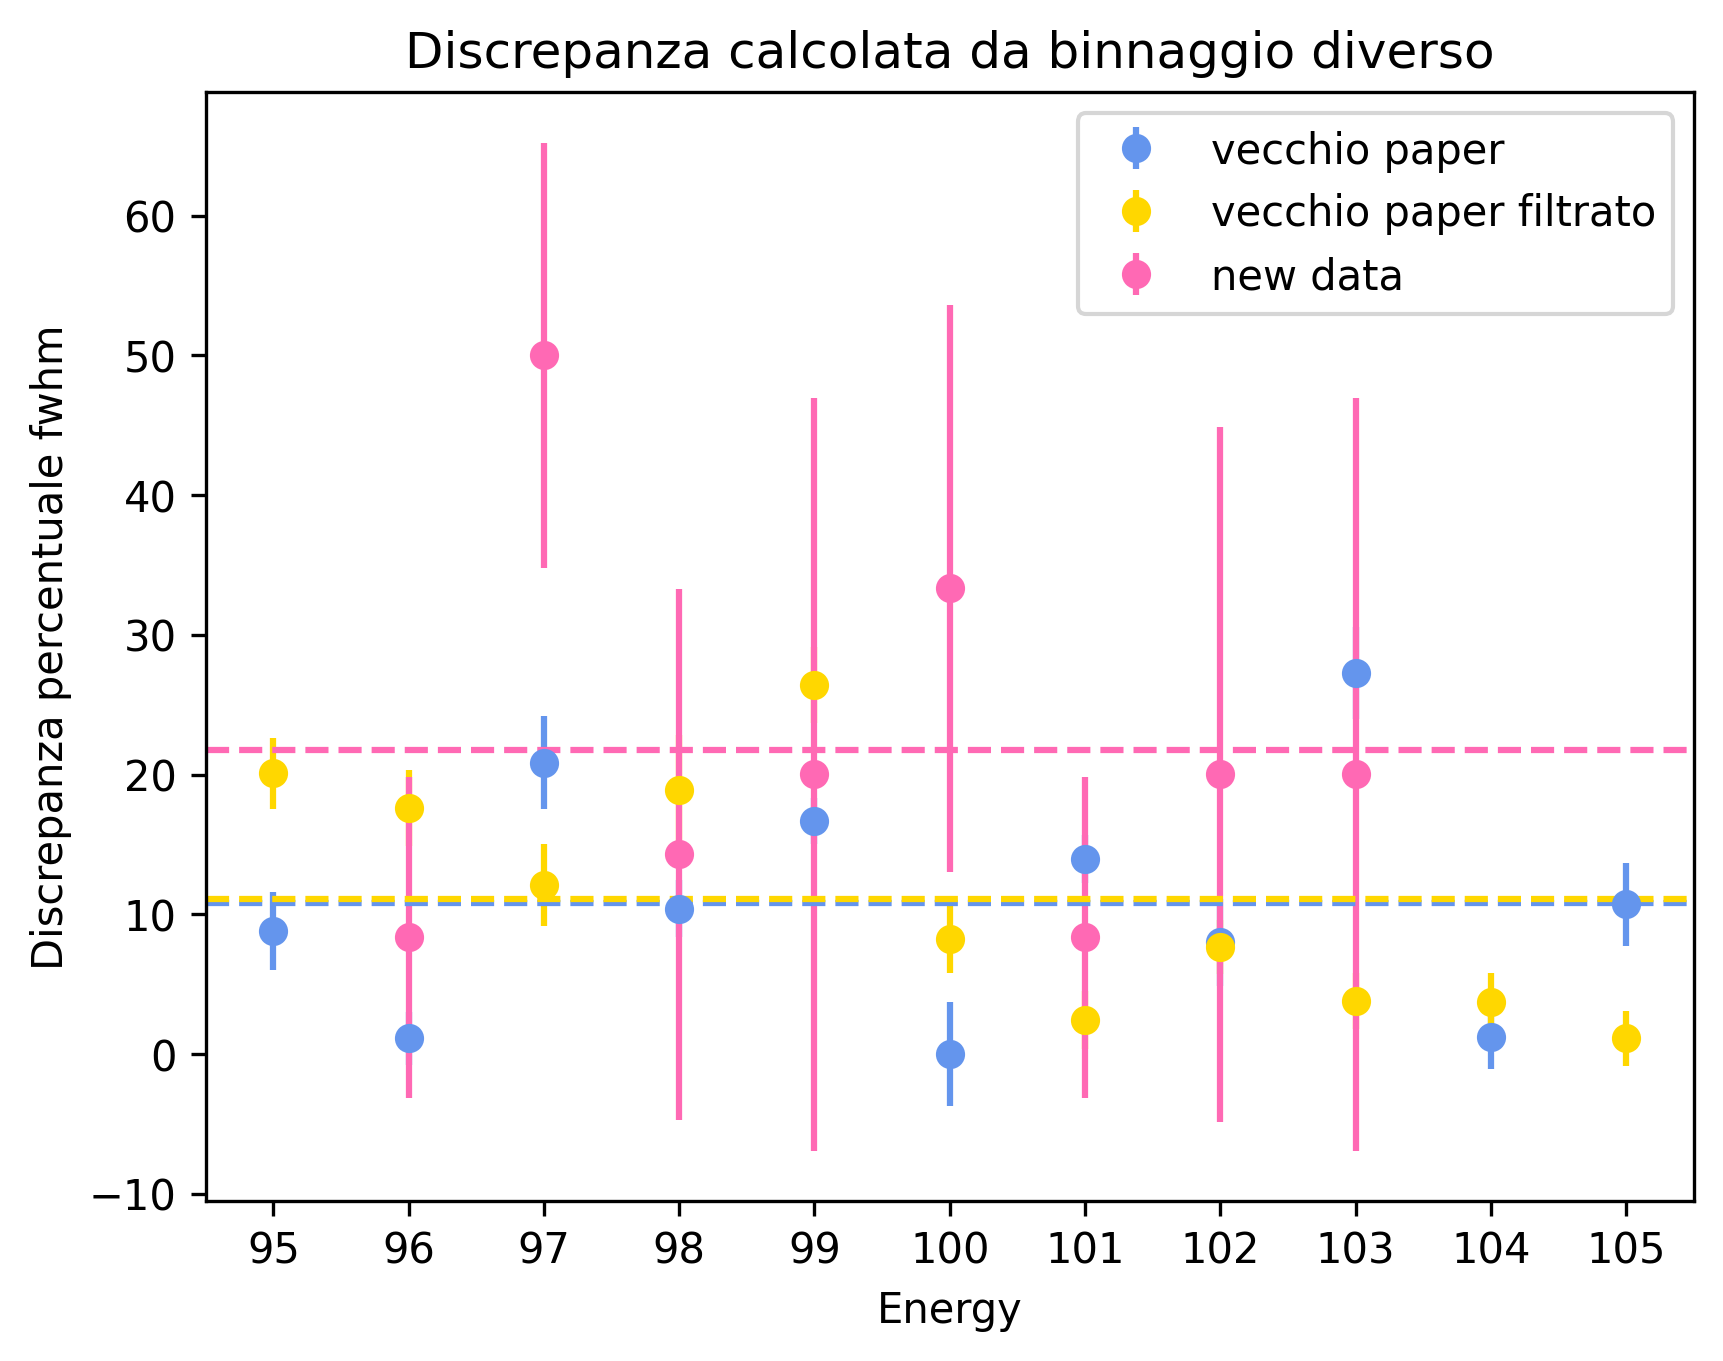

In [10]:
# Plot dei punti con plt.plot
plt.figure(dpi=300)
plt.errorbar(Energy_cd188, syst_cd188, yerr = syst_err_cd188, marker='o', linestyle='None', color = 'cornflowerblue', label = "vecchio paper")
plt.errorbar(Energy_cd188, syst_cd188f, yerr = syst_err_cd188f, marker='o', linestyle='None', color = 'gold', label = "vecchio paper filtrato")
plt.errorbar(Energy_cd204, syst_cd204, yerr = syst_err_cd204, marker='o', linestyle='None', color = 'hotpink', label = "new data")
plt.axhline(y=media_cd188, color = 'cornflowerblue', linestyle='--')
plt.axhline(y=media_cd188f, color= 'gold', linestyle='--')
plt.axhline(y=media_cd204, color='hotpink', linestyle='--')
# Etichette e titolo
plt.xlabel("Energy")
plt.xticks(np.arange(95, 106, 1))
plt.ylabel("Discrepanza percentuale fwhm")
plt.title("Discrepanza calcolata da binnaggio diverso")
plt.legend()

plt.savefig("syst_fwhm_cd188.png", dpi=300)
plt.show()

